<div class="alert alert-block alert-success">
    
    
### <center> Time Series Forecasting </center>


<br>
    
</div>

<div class="alert alert-block alert-warning">
    <br>
There are many articles and jupyter notebook scripts available on the internet that discuss Time Series Forecasting in detail, the following are the most noteable references for the original authors contributions that the work in this script is based on. 

        
## References:

- https://en.wikipedia.org/wiki/Time_series
- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
- https://towardsdatascience.com/time-forecast-with-tpot-b2d87eaba59c
- https://towardsdatascience.com/sales-forecasting-with-price-promotion-effects-b5d70207b128
- https://towardsdatascience.com/sales-forecasting-with-price-promotion-effects-b5d70207b128
- https://www.kaggle.com/ashishpatel26/lstm-demand-forecasting   
- https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651
- https://www.tensorflow.org/tutorials/structured_data/time_series
- https://keras.io/api/layers/recurrent_layers/lstm/
- https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237 
- https://towardsdatascience.com/sales-forecasting-from-time-series-to-deep-learning-5d115514bfac
- https://curiousily.com/posts/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python/
- https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique
- https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
    
    
    
</div>


<hr style="border:5px solid orange"> </hr>

<br><br><br><br>

# Prophet                                                         

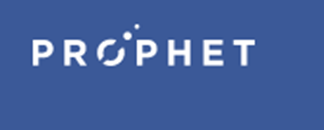

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

<hr style="border:5px solid orange"> </hr>


<br><br><br><br>

# StatsModels

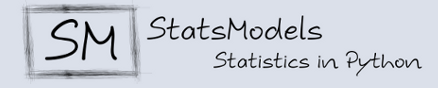

StatsModels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.

<hr style="border:5px solid orange"> </hr>


<br><br><br><br>

# Keras & TensorFlow 2

TensorFlow 2 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. It combines four key abilities:

- Efficiently executing low-level tensor operations on CPU, GPU, or TPU.
- Computing the gradient of arbitrary differentiable expressions.
- Scaling computation to many devices (e.g. the Summit supercomputer at Oak Ridge National Lab, which spans 27,000 GPUs).
- Exporting programs ("graphs") to external runtimes such as servers, browsers, mobile and embedded devices.

Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

<hr style="border:5px solid orange"> </hr>

<br><br><br><br>


# TensorFlow/Keras LSTM


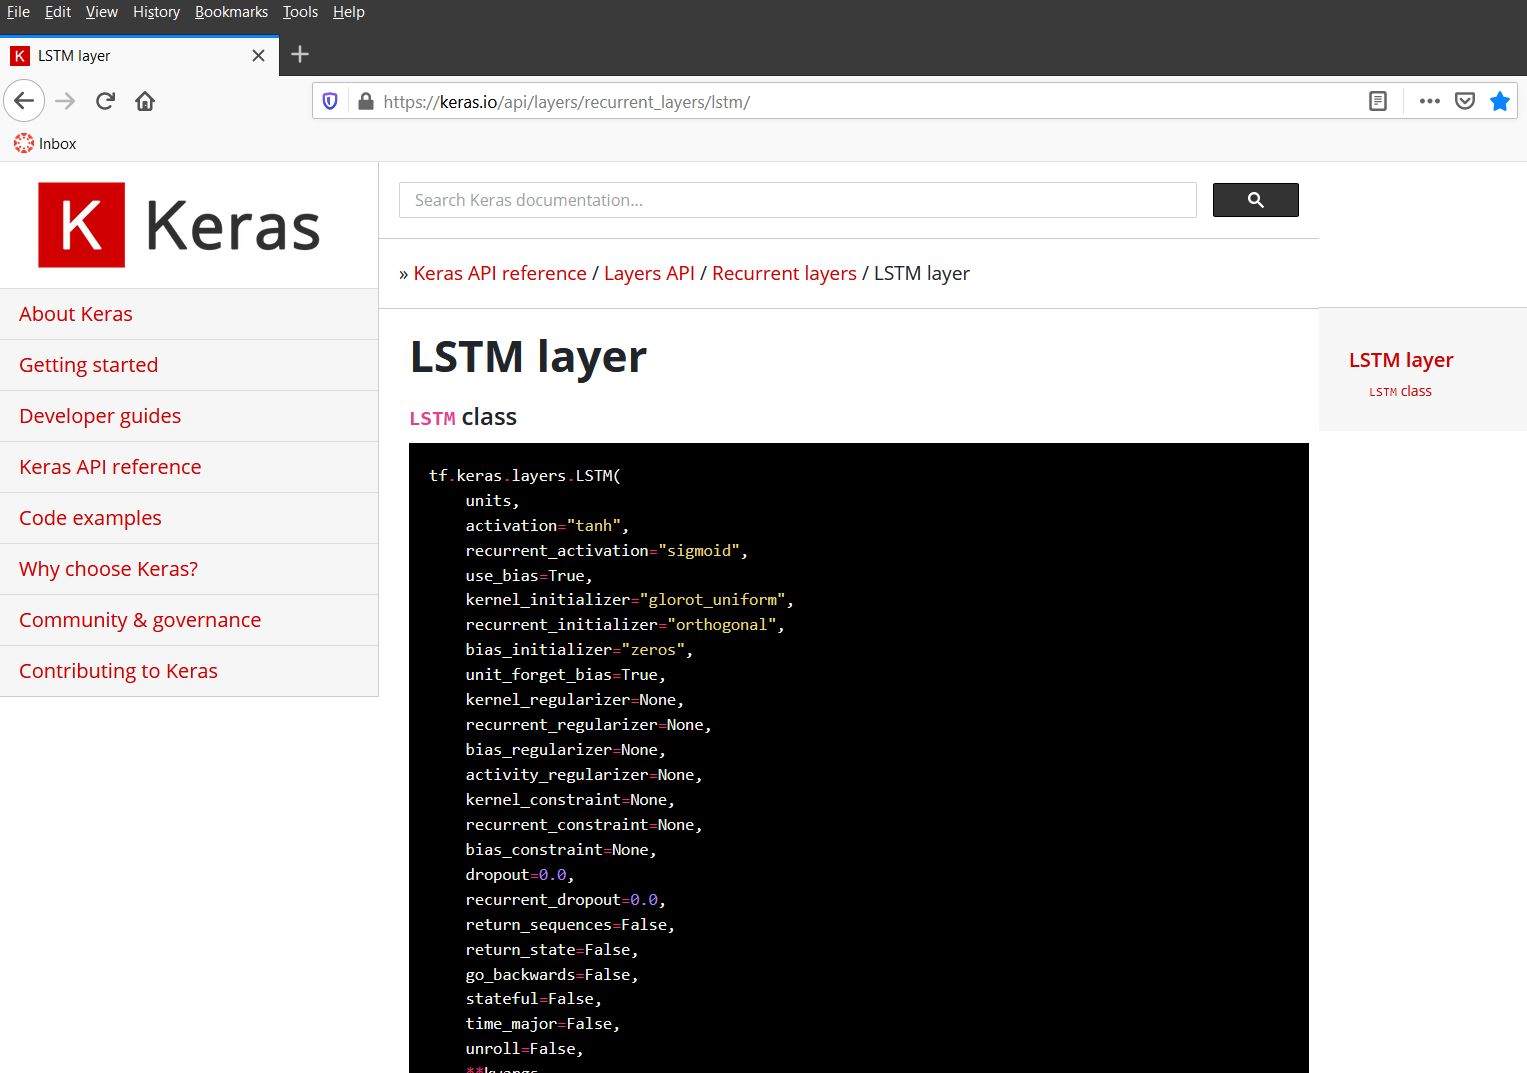


<hr style="border:5px solid orange"> </hr>


<br><br><br><br>

# Installation Steps

### 1.) Open Anaconda Prompt 
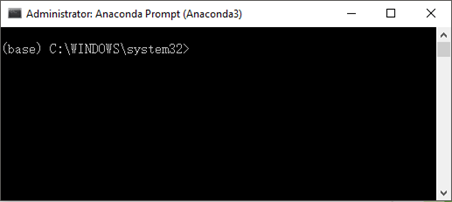


### 2.) Install packages



#### a.) TensorFlow
https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/

pip install tensorflow



#### b.) StatsModels
https://www.statsmodels.org/stable/install.html

pip install statsmodels



#### c.) Prophet (pystan is the dependency for prophet)
https://facebook.github.io/prophet/docs/installation.html

pip install pystan==2.19.1.1

**For windows execute additional command:** conda install libpython m2w64-toolchain -c msys2

pip install prophet

<hr style="border:5px solid orange"> </hr>


<br><br><br>


<div class="alert alert-info">

# Time Series Forecasting
    
    
## How to Forecast?
- Product Demand
- Order Deliveries
- Sales 

## In different Zip Codes for a giant retailer like Amazon
    
    
    

</div>

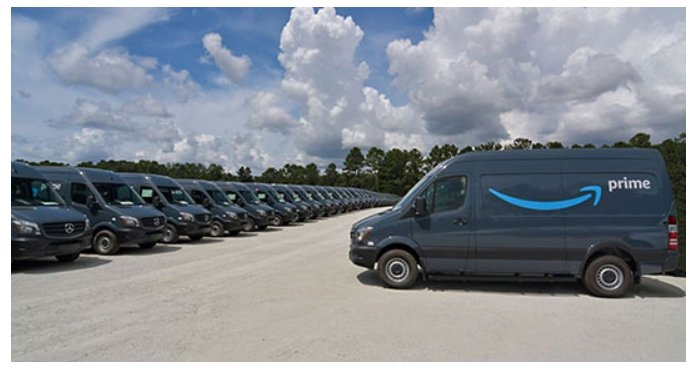

<div class="alert alert-block alert-warning">
    <br>

        
## Forecast Models:

- **Prophet:** https://facebook.github.io/prophet/docs/quick_start.html
- **StatModel ARIMA:** https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.html
- **Google/Tensorflow LSTM:** https://www.tensorflow.org/tutorials/structured_data/time_series
    
    
    
</div>

<div class="alert alert-block alert-danger">
    
    

### Requirements: 
- Load and inspect Transactions.csv dataset
- Execute descriptive analytics tasks for Orders distribution for products sold in different Zip Codes
- Execute 3 experiements for machine learning and deep learning to Forecast number of Orders, and Orders per Zip Code, total orders delivered and delivery count per Zip Code


<br>
    
</div>

<div class="alert alert-block alert-warning">
    <br>   
    
##  Pip commands you need to run:
- pip install plotly
- pip install pystan==2.19.1.1
- pip install prophet
- pip install statsmodels
- pip install tensorflow
- pip install pmdarima
    <br>

In [1]:
import pandas as pd

import datetime
from datetime import datetime, date, timedelta
import time
from math import isnan
import numpy as np

import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

import pystan
import prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima
from pmdarima.arima.utils import ndiffs


import tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.python.util.deprecation as deprecation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings

deprecation._PRINT_DEPRECATION_WARNINGS = False
warnings.filterwarnings('ignore')

### Check versions:

In [2]:
from platform import python_version
print('python version installed     :', python_version(),'    ,needed: 3.7.7')
print('pmdarima version installed   :', pmdarima.__version__,'    ,needed: 1.8.0')
print('tensorflow version installed :', tensorflow.__version__,'    ,needed: 2.4.1')
print('statsmodel version installed :', statsmodels.__version__,'   ,needed: 0.11.1')
print('prophet version installed    :', prophet.__version__,'      ,needed: 1.0')
print('pystan version installed     :', pystan.__version__,' ,needed: 2.19.1.1') 
print('plotly version installed     :', plotly.__version__,'   ,needed: 4.14.3')
print('matplotlib version installed :', matplotlib.__version__,'    ,needed: 3.2.2')

python version installed     : 3.7.7     ,needed: 3.7.7
pmdarima version installed   : 1.8.0     ,needed: 1.8.0
tensorflow version installed : 2.4.1     ,needed: 2.4.1
statsmodel version installed : 0.11.1    ,needed: 0.11.1
prophet version installed    : 1.0       ,needed: 1.0
pystan version installed     : 2.19.1.1  ,needed: 2.19.1.1
plotly version installed     : 4.14.3    ,needed: 4.14.3
matplotlib version installed : 3.2.2     ,needed: 3.2.2


In [3]:
import numpy
print(numpy.__version__)

1.19.5




<div class="alert alert-info">

  
    
## Load and Preprocess the data
- Count how many total deliveries
- Count how many deliveries per Zip Code
- Total number of Orders 
- Total number of Orders per Zip Code
- Total Number of Products ordered per Zip Code
- Total Number of Orders for every Product in every Zip Code per Month

</div>
    
    
    


In [4]:
df = pd.read_csv('Transactions.csv')
df = df.dropna()
df['Delivery_Zip_Code'] = df['Delivery_Zip_Code'].astype(int)
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
0  566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
1  274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2  455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
3  254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
4  563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                OrderID Customer_Occupation  \
0  50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1  f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2  7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
3  cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5               Actor   
4  a9d66460-a48f-419f-8d39-7818290a3041               Actor   

   Credit_Card_Number  Order_ID  Order_Date Expected_Delivery_Date  ...  \
0         12345789032        98    4/7/2020              4/11/2020  ...   
1         12345789032       131   5/10/2020              5/14/2020  ...   
2         12345789032       318  11/13/2020             11/17/2020  ...   
3         12345789032       528   2/12/2020              2/16/2020  ...   
4         12345789032       561   2/12/2020              2/16/2020  ...   

   Product_Name Category  Manufacturer Review_Rating Delivery_Tracking_ID  \
0  Fitbit small  fitness  Fitbit small             3                   98   
1  Fitbit small  fitness  Fitbit small             3                  131   
2  Fitbit small  fitness  Fitbit small             3                  318   
3  Fitbit large  fitness  Fitbit large             5                  528   
4  Fitbit large  fitness  Fitbit large             5                  561   

   Delivery_Type  Delivery_Zip_Code Transaction_Status  Order_Returned  \
0         Pickup              10048           Disputed               1   
1         Pickup              10048           Disputed               1   
2         Pickup              10048           Disputed               1   
3         Pickup              10048           Disputed               0   
4         Pickup              10048           Disputed               0   

  Order_Delivered_on_Time  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 22 columns]

In [5]:
df['Order_ID'].count()

16372

In [6]:
df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])
df.set_index('Actual_Delivery_Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

In [7]:
df.dtypes

CustomerID                         object
FirstName                          object
LastName                           object
CreditCardNumber                   object
OrderID                            object
Customer_Occupation                object
Credit_Card_Number                  int64
Order_ID                            int64
Order_Date                 datetime64[ns]
Expected_Delivery_Date     datetime64[ns]
Product_ID                         object
Product_Name                       object
Category                           object
Manufacturer                       object
Review_Rating                       int64
Delivery_Tracking_ID                int64
Delivery_Type                      object
Delivery_Zip_Code                   int32
Transaction_Status                 object
Order_Returned                      int64
Order_Delivered_on_Time             int64
year                                int64
month                               int64
day                               

In [8]:
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
Actual_Delivery_Date                                                         
2020-04-15            566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
2020-05-18            274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2020-11-21            455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
2020-02-20            254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
2020-02-20            563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                                   OrderID  \
Actual_Delivery_Date                                         
2020-04-15            50787284-d78d-4b6a-b93f-7419b0d46590   
2020-05-18            f61639d7-28de-4507-a63a-71e99921d8f9   
2020-11-21            7b1caf69-bd5b-441c-9115-6fa31ba1c313   
2020-02-20            cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5   
2020-02-20            a9d66460-a48f-419f-8d39-7818290a3041   

                     Customer_Occupation  Credit_Card_Number  Order_ID  \
Actual_Delivery_Date                                                     
2020-04-15                        Lawyer         12345789032        98   
2020-05-18                        Lawyer         12345789032       131   
2020-11-21                        Lawyer         12345789032       318   
2020-02-20                         Actor         12345789032       528   
2020-02-20                         Actor         12345789032       561   

                     Order_Date Expected_Delivery_Date  ...  \
Actual_Delivery_Date                                    ...   
2020-04-15           2020-04-07             2020-04-11  ...   
2020-05-18           2020-05-10             2020-05-14  ...   
2020-11-21           2020-11-13             2020-11-17  ...   
2020-02-20           2020-02-12             2020-02-16  ...   
2020-02-20           2020-02-12             2020-02-16  ...   

                     Delivery_Tracking_ID Delivery_Type Delivery_Zip_Code  \
Actual_Delivery_Date                                                        
2020-04-15                             98        Pickup             10048   
2020-05-18                            131        Pickup             10048   
2020-11-21                            318        Pickup             10048   
2020-02-20                            528        Pickup             10048   
2020-02-20                            561        Pickup             10048   

                     Transaction_Status  Order_Returned  \
Actual_Delivery_Date                                      
2020-04-15                     Disputed               1   
2020-05-18                     Disputed               1   
2020-11-21                     Disputed               1   
2020-02-20                     Disputed               0   
2020-02-20                     Disputed               0   

                      Order_Delivered_on_Time  year  month day  week_of_year  
Actual_Delivery_Date                                                          
2020-04-15                                  1  2020      4  15            16  
2020-05-18                                  1  2020      5  18            21  
2020-11-21                                  1  2020     11  21            47  
2020-02-20                                  1  2020      2  20             8  
2020-02-20                                  1  2020      2  20             8  

[5 rows x 25 columns]





<div class="alert alert-info">

  
    
## Descriptive Analytics


</div>
    

In [9]:
df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product')

Product_Name  Total_orders_per_product
0           Bose                       910
1   Fitbit large                      2903
2   Fitbit small                      2904
3  Harman Kardon                      1445
4            JBL                       910
5       Logitech                      1525
6          Redmi                       910
7    Samsung s10                       910
8           Sony                      2435
9            VR7                      1520

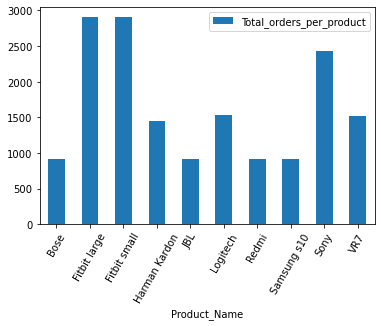

In [10]:
ax = df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product').plot.bar(x='Product_Name', y='Total_orders_per_product', rot=60)





<div class="alert alert-info">

  
    
## Deliveries/Orders per  Zip Code Distribution


</div>
    


In [11]:
df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zipcode')

Delivery_Zip_Code  Total_orders_per_zipcode
0               10048                       413
1               10110                       394
2               10121                       391
3               10123                       439
4               10168                       416
..                ...                       ...
57              90076                       369
58              90077                       292
59              90080                       301
60              90097                       395
61              90774                       388

[62 rows x 2 columns]

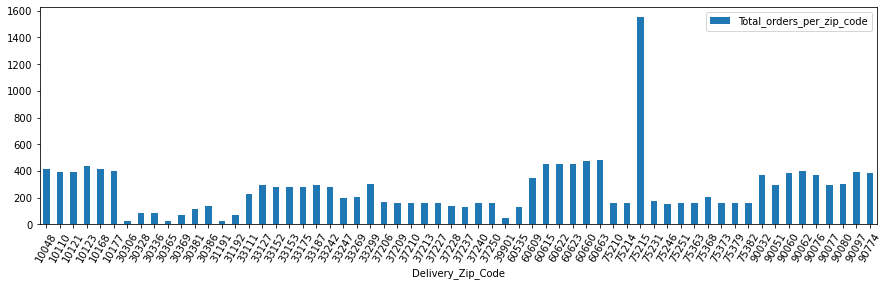

In [12]:
ax1 = df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zip_code').plot.bar(x='Delivery_Zip_Code', y='Total_orders_per_zip_code', rot=60, figsize=(15, 4))


In [13]:
Categories = df['Category'].unique()
Categories

array(['fitness', 'phone', 'speaker', 'tv', 'vr'], dtype=object)

In [14]:
Zips = df['Delivery_Zip_Code'].unique()
Zips

array([10048, 10110, 10121, 10123, 10168, 10177, 30306, 30328, 30336,
       30365, 30369, 30381, 30386, 31191, 31192, 33111, 33127, 33152,
       33153, 33175, 33187, 33242, 33247, 33269, 33299, 37206, 37209,
       37210, 37213, 37227, 37228, 37237, 37240, 37250, 39901, 60609,
       60535, 60615, 60622, 60623, 60660, 60663, 75210, 75214, 75215,
       75231, 75246, 75251, 75363, 75368, 75373, 75379, 75382, 90032,
       90051, 90060, 90062, 90076, 90077, 90080, 90097, 90774])

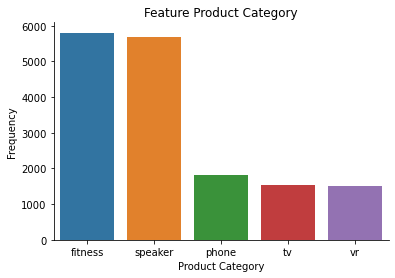

In [15]:
sort_X1 = df.groupby('Category').size()\
                    .sort_values(ascending=False)\
                    .index
#plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=df, order = sort_X1)
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Feature Product Category')
sns.despine();

In [16]:
df_bx = pd.DataFrame({'count' : df.groupby( [ "Category", "Delivery_Zip_Code"] ).size()}).reset_index()


df_bx[1:303]

Category  Delivery_Zip_Code  count
1    fitness              10110    139
2    fitness              10121    137
3    fitness              10123    154
4    fitness              10168    147
5    fitness              10177    148
..       ...                ...    ...
298       vr              90060     38
299       vr              90062     41
300       vr              90076     40
301       vr              90077     27
302       vr              90080     23

[302 rows x 3 columns]

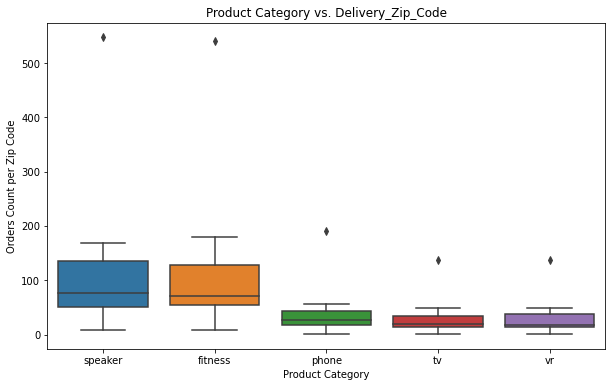

In [17]:
sort_y = df_bx.groupby('Category')['count']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))

sns.boxplot(y='count', x='Category', data=df_bx, order=sort_y)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Product Category')
plt.ylabel('Orders Count per Zip Code')
plt.title('Product Category vs. Delivery_Zip_Code')
plt.show();



<div class="alert alert-info">

  
    
## Time Series Forecasting

- Calculate Total number of orders per Date


</div>



In [18]:
slice_for_zip_code = df.loc[df['Delivery_Zip_Code'] == 60535]

In [19]:
df_deliveries_count = slice_for_zip_code.groupby(['Expected_Delivery_Date'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')
df_deliveries_count

Expected_Delivery_Date  Total_Number_of_orders
0               2018-01-10                       1
1               2018-01-16                       1
2               2018-01-18                       2
3               2018-01-31                       1
4               2018-02-05                       1
..                     ...                     ...
107             2020-11-11                       1
108             2020-11-18                       1
109             2020-11-26                       1
110             2020-11-29                       1
111             2020-12-19                       1

[112 rows x 2 columns]


<div class="alert alert-info">

  
    
## Distribution of Products Bought in Zip Codes

- Create 6-months bins


</div>






In [20]:
bins_dt = pd.date_range('2018-01-01', freq='6MS', periods=8)
bins_str = bins_dt.astype(str).values

labels = ['(2018-01-01, 2018-06-31)',
          '(2018-07-01, 2018-12-31)',
          '(2019-01-01, 2019-06-31)',
          '(2019-07-01, 2019-12-31)',
          '(2020-01-01, 2020-06-31)',
          '(2020-07-01, 2020-12-31)',
          '(2021-01-01, 2021-06-31)']
df_6_months_bins = df.groupby(['Expected_Delivery_Date'
                   ,'Product_Name'
                   ,'Delivery_Zip_Code'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')

df_6_months_bins['bins'] = pd.cut(df_6_months_bins['Expected_Delivery_Date'].astype(np.int64)//10**9,
                   bins=bins_dt.astype(np.int64)//10**9,
                   labels=labels)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [21]:
df_6_months_bins

Expected_Delivery_Date Product_Name  Delivery_Zip_Code  \
0                 2018-01-05     Logitech              33242   
1                 2018-01-05     Logitech              60622   
2                 2018-01-05     Logitech              75215   
3                 2018-01-05     Logitech              90062   
4                 2018-01-05        Redmi              37210   
...                      ...          ...                ...   
12102             2021-01-04  Samsung s10              10123   
12103             2021-01-04  Samsung s10              33127   
12104             2021-01-04  Samsung s10              75210   
12105             2021-01-04  Samsung s10              75214   
12106             2021-01-04  Samsung s10              75215   

       Total_Number_of_orders                      bins  
0                           2  (2018-01-01, 2018-06-31)  
1                           1  (2018-01-01, 2018-06-31)  
2                           1  (2018-01-01, 2018-06-31)  
3                           1  (2018-01-01, 2018-06-31)  
4                           1  (2018-01-01, 2018-06-31)  
...                       ...                       ...  
12102                       1  (2021-01-01, 2021-06-31)  
12103                       1  (2021-01-01, 2021-06-31)  
12104                       1  (2021-01-01, 2021-06-31)  
12105                       1  (2021-01-01, 2021-06-31)  
12106                       1  (2021-01-01, 2021-06-31)  

[12107 rows x 5 columns]

In [22]:
grouped_bin_df = df_6_months_bins.groupby(['bins','Product_Name','Delivery_Zip_Code'])['Total_Number_of_orders'].sum().reset_index(name ='Total_Number_of_orders')
grouped_bin_df['Total_Number_of_orders'] = grouped_bin_df['Total_Number_of_orders'].fillna(0)
grouped_bin_df.head(10)

bins Product_Name  Delivery_Zip_Code  \
0  (2018-01-01, 2018-06-31)         Bose              10048   
1  (2018-01-01, 2018-06-31)         Bose              10110   
2  (2018-01-01, 2018-06-31)         Bose              10121   
3  (2018-01-01, 2018-06-31)         Bose              10123   
4  (2018-01-01, 2018-06-31)         Bose              10168   
5  (2018-01-01, 2018-06-31)         Bose              10177   
6  (2018-01-01, 2018-06-31)         Bose              30306   
7  (2018-01-01, 2018-06-31)         Bose              30328   
8  (2018-01-01, 2018-06-31)         Bose              30336   
9  (2018-01-01, 2018-06-31)         Bose              30365   

   Total_Number_of_orders  
0                     2.0  
1                     2.0  
2                     1.0  
3                     2.0  
4                     4.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     2.0  
9                     0.0


<div class="alert alert-info">

  
    
## Lets filter total orders for specific list of Zip Codes

- List of Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]


</div>


In [23]:
zip_codes = [60623, 60663, 60609, 60660, 60615, 60622]
grouped_bin_df = grouped_bin_df[grouped_bin_df.Delivery_Zip_Code.isin(zip_codes)]
grouped_bin_df

bins Product_Name  Delivery_Zip_Code  \
36    (2018-01-01, 2018-06-31)         Bose              60609   
37    (2018-01-01, 2018-06-31)         Bose              60615   
38    (2018-01-01, 2018-06-31)         Bose              60622   
39    (2018-01-01, 2018-06-31)         Bose              60623   
40    (2018-01-01, 2018-06-31)         Bose              60660   
...                        ...          ...                ...   
4315  (2021-01-01, 2021-06-31)          VR7              60615   
4316  (2021-01-01, 2021-06-31)          VR7              60622   
4317  (2021-01-01, 2021-06-31)          VR7              60623   
4318  (2021-01-01, 2021-06-31)          VR7              60660   
4319  (2021-01-01, 2021-06-31)          VR7              60663   

      Total_Number_of_orders  
36                       6.0  
37                       2.0  
38                       8.0  
39                       3.0  
40                       7.0  
...                      ...  
4315                     0.0  
4316                     0.0  
4317                     0.0  
4318                     0.0  
4319                     0.0  

[420 rows x 4 columns]

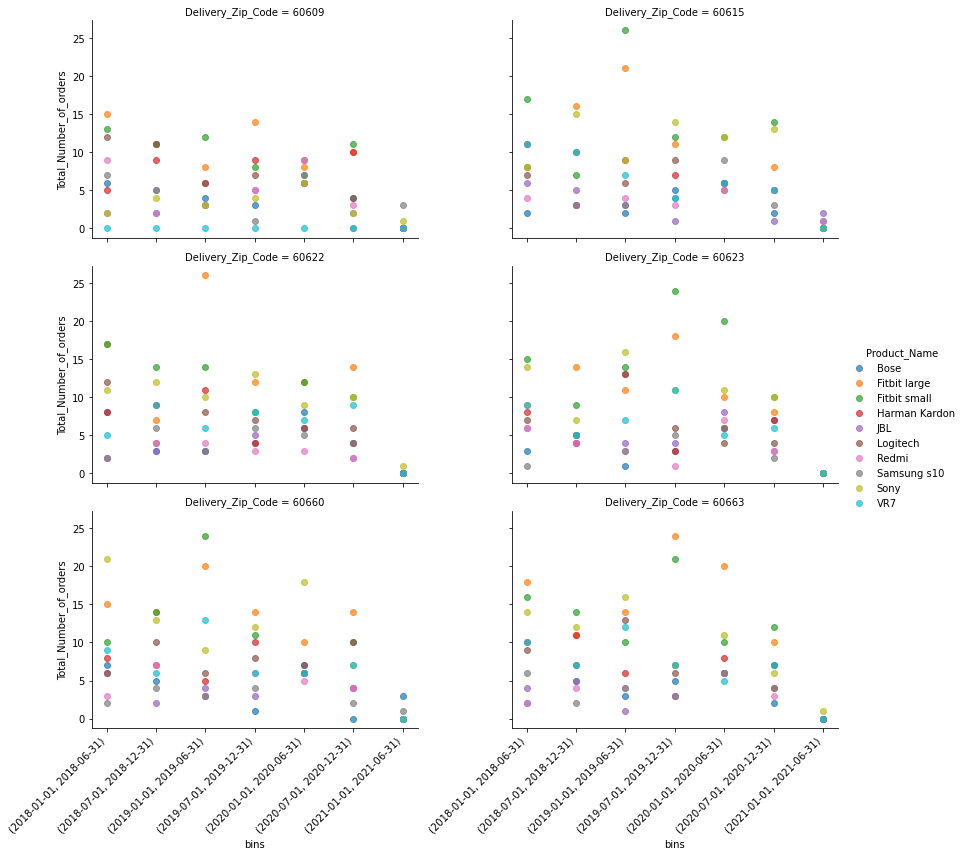

In [24]:
g = sns.FacetGrid(grouped_bin_df, col="Delivery_Zip_Code", hue="Product_Name", margin_titles=True, col_wrap=2, height=4, aspect=1.5)
g.map(plt.scatter, 'bins', 'Total_Number_of_orders', alpha=.7)
ha = ['right', 'center', 'left']
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha=ha[0])
plt.tight_layout(h_pad=1)
g.add_legend();





<div class="alert alert-info">

  
    
## Total number of Orders per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


In [25]:
monthly_df = df.groupby(['month',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df = monthly_df[monthly_df.Delivery_Zip_Code.isin(zip_codes)]
monthly_df

month  Delivery_Zip_Code  Total_Number_of_orders_per_month
36       1              60609                                45
37       1              60615                                59
38       1              60622                                54
39       1              60623                                68
40       1              60660                                66
..     ...                ...                               ...
714     12              60615                                39
715     12              60622                                36
716     12              60623                                32
717     12              60660                                41
718     12              60663                                40

[72 rows x 3 columns]

In [26]:
monthly_df_products = df.groupby(['month',
                         'Product_Name',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df_products = monthly_df_products[monthly_df_products.Delivery_Zip_Code.isin(zip_codes)]
monthly_df_products

month Product_Name  Delivery_Zip_Code  Total_Number_of_orders_per_month
21        1         Bose              60609                                 4
22        1         Bose              60615                                 4
23        1         Bose              60622                                 4
24        1         Bose              60623                                 2
25        1         Bose              60660                                 6
...     ...          ...                ...                               ...
4973     12          VR7              60615                                 2
4974     12          VR7              60622                                 4
4975     12          VR7              60623                                 4
4976     12          VR7              60660                                 2
4977     12          VR7              60663                                 5

[639 rows x 4 columns]




<div class="alert alert-info">

  
    
## Total number of Orders  per Zip Code per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


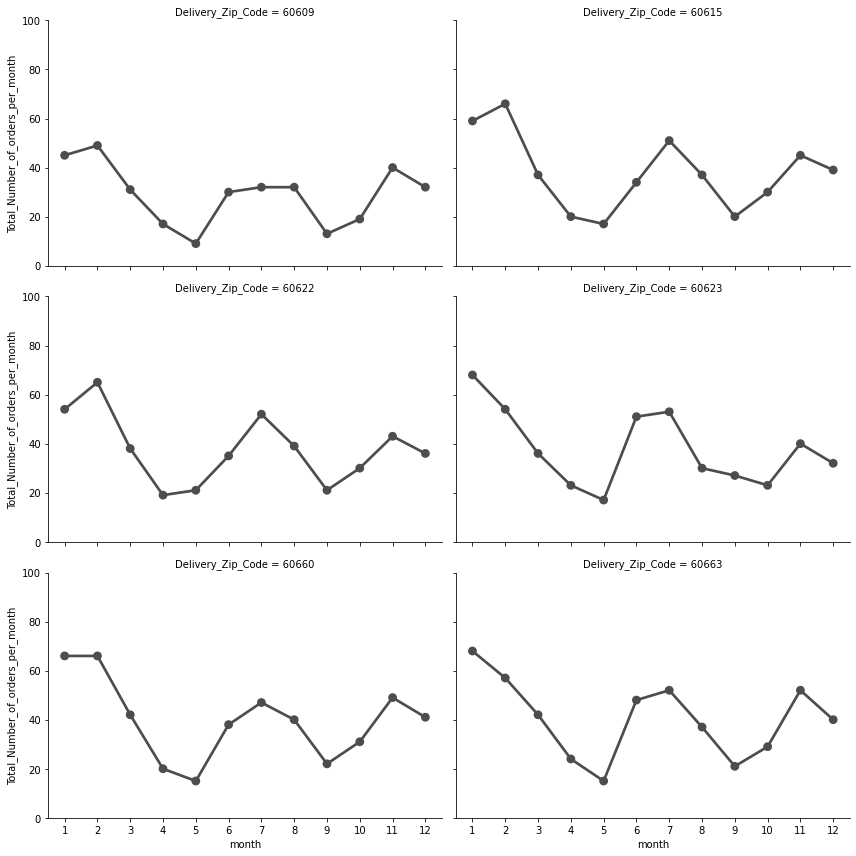

In [27]:
g = sns.FacetGrid(monthly_df, col="Delivery_Zip_Code", col_wrap=2,  ylim=(0, 100), height=4, aspect=1.5)
g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", color=".3", ci=None);





<div class="alert alert-info">

  
    
## Total Number of Orders per Product per Zip Code per Month:
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]





</div>

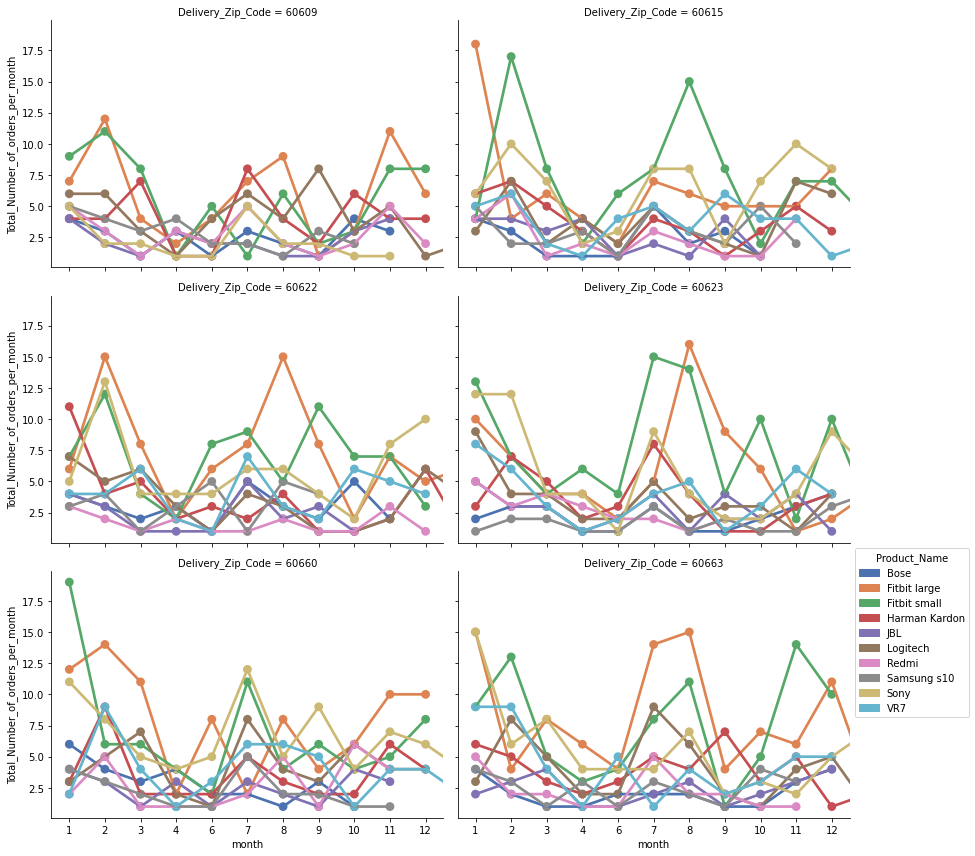

In [28]:
from matplotlib import patches
g = sns.FacetGrid(monthly_df_products, col="Delivery_Zip_Code", 
                  hue="Product_Name",
                  margin_titles=True, 
                  col_wrap=2, palette="deep", 
                  height=4, aspect=1.5)

g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", ci=None)  # 
labels = ["Bose","Fitbit large","Fitbit small","Harman Kardon","JBL","Logitech","Redmi","Samsung s10","Sony","VR7"] #hue_order
colors = sns.color_palette("deep").as_hex()[:len(labels)]
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,labels)]
plt.legend(handles=handles,title='Product_Name',loc='center left',bbox_to_anchor=(1,0.75));

In [29]:
fig = px.line(df_deliveries_count, x='Expected_Delivery_Date', y='Total_Number_of_orders')
fig.update_layout(title_text='Time Series of daily order counts for all users for zip code: 60535')
fig.show()



<div class="alert alert-success">

# Experiment #1
    
## Prophet Timeseries Forecasting

    

</div>

<div class="alert alert-info">   
    
### Forecasting orders for zip code: 60535
    
</div>

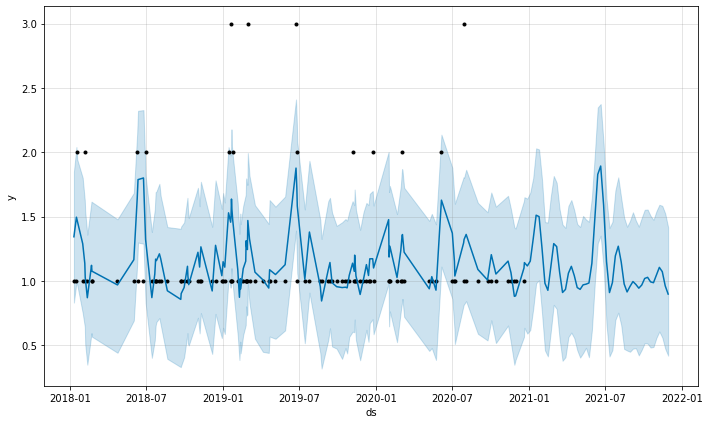

In [30]:
df_deliveries_count = df_deliveries_count.rename(columns = {'Expected_Delivery_Date': 'ds',
                                'Total_Number_of_orders': 'y'})
 
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(df_deliveries_count) 
future_dates = model.make_future_dataframe(periods = 50, freq='W')
forecast = model.predict(future_dates)

model.plot(forecast);

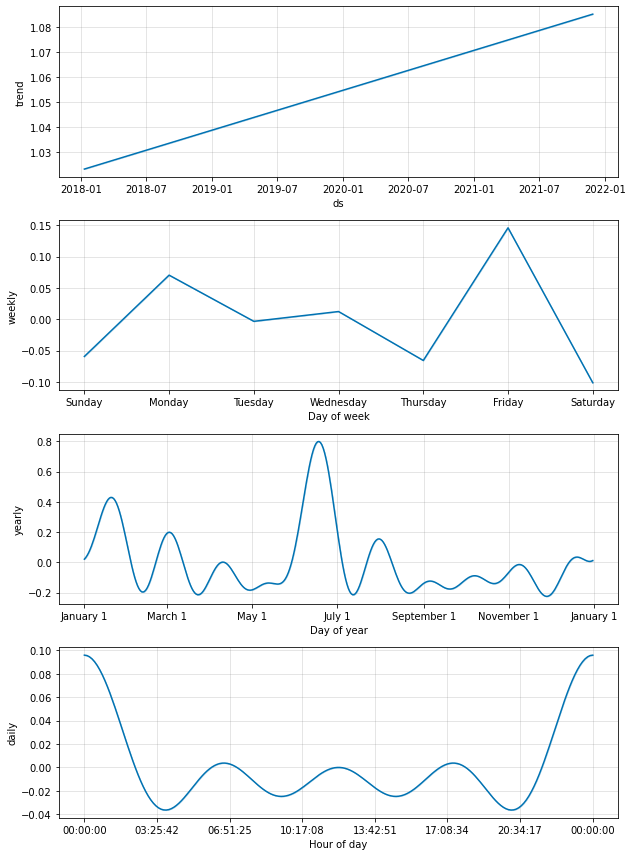

In [31]:
model.plot_components(forecast);

<div class="alert alert-warning">

    
### Prediction info:
**Hoover the mouse over the chart to see data and predicted values**

    

</div>

In [32]:
plot_plotly(model, forecast)

In [33]:
plot_components_plotly(model, forecast)

<div class="alert alert-info">   

### Forecasting orders for all zip codes:
    
</div>

In [34]:
df_deliveries_allzip = df.groupby(['Expected_Delivery_Date'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')
df_deliveries_allzip = df_deliveries_allzip.rename(columns = {'Expected_Delivery_Date': 'ds',
                                'Total_Number_of_orders': 'y'})
 
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(df_deliveries_allzip) 
future_dates = model.make_future_dataframe(periods = 50, freq='W')
forecast = model.predict(future_dates)

plot_plotly(model, forecast)

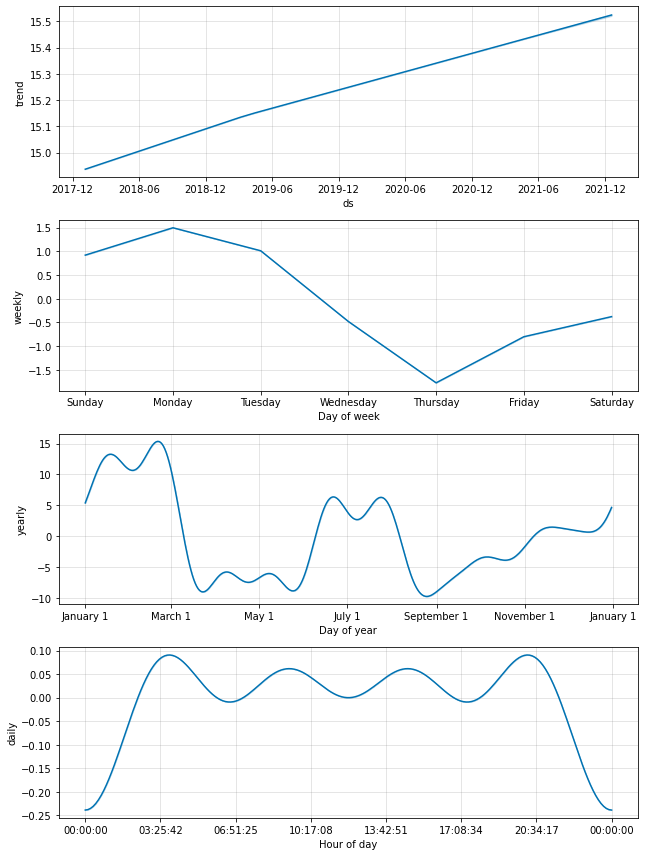

In [35]:
model.plot_components(forecast);




<div class="alert alert-success">

# Experiment #2
    
## StatModel Timeseries Forecasting

    

</div>

<div class="alert alert-info">   
    
### Forecasting orders for zip code: 60535
    
</div>

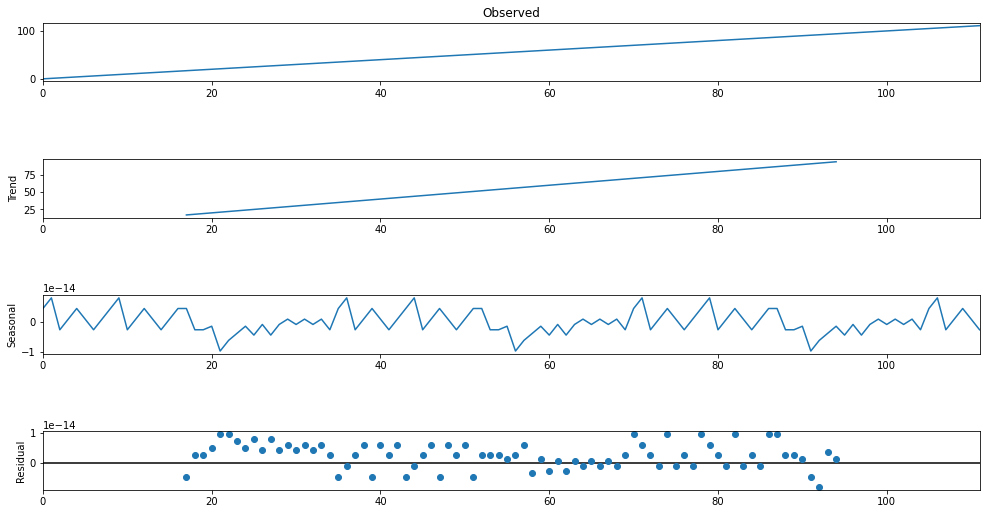

In [36]:
# Model to forecast orders for zip code = 60535
df_deliveries_count.set_index('ds')
predict = sm.tsa.seasonal_decompose(df_deliveries_count.index, freq=35)
figure = predict.plot()
figure.set_size_inches(15, 8)

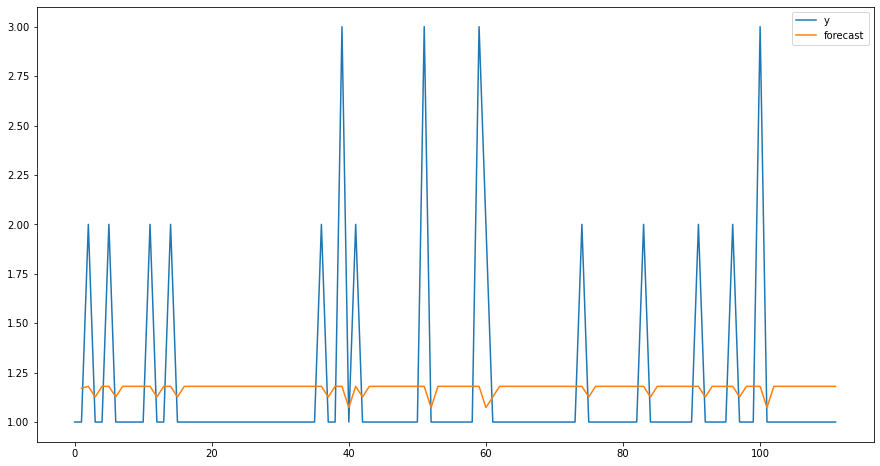

In [37]:
df_stats_model = df_deliveries_count
model = sm.tsa.ARIMA(df_stats_model['y'].iloc[1:], order = (1,0,0))
results = model.fit()
df_stats_model['forecast'] = results.fittedvalues
df_stats_model[['y', 'forecast']].plot(figsize=(15,8))

<div class="alert alert-warning">
    <br>
Since the evaluation is not consistant with the actual data, fine tuning the hyperparameters (p, d, q) of ARIMA model will yield a better result. We now proceed to plot the ACF and PACF plots. A quick reading of this documents will help in interpreating the graphs: 
 
- http://people.duke.edu/~rnau/411arim3.htm
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    </div>

<div class="alert alert-info">
Check the ACF graph:
    
- ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. We determine p using the ACF graph.
    </div>

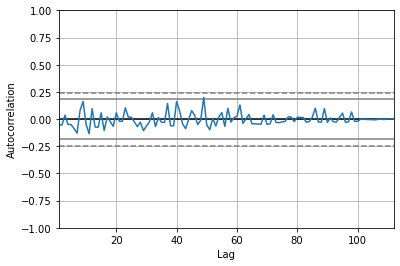

In [38]:
df_deliveries_series = pd.Series(df_deliveries_count['y'].values, index=df_deliveries_count['ds'])
pd.plotting.autocorrelation_plot(pd.Series(df_deliveries_series))
plt.show()

<div class="alert alert-warning">
It can be seen that there is one significant value so p = 1
    </div>

<div class="alert alert-info">
Check the PACF graph:

- PACF only describes the direct relationship between an observation and its lag. We determine q from this graph.
    </div>

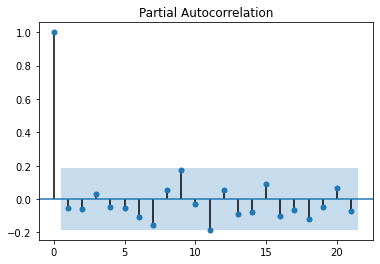

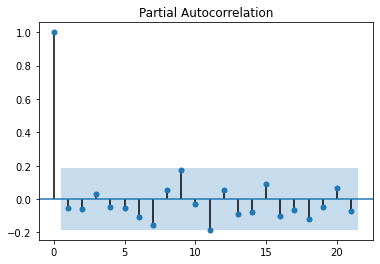

In [39]:
plot_pacf(df_deliveries_series)

<div class="alert alert-warning">
It can be seen that there is one significant value so q = 1
</div>

<div class="alert alert-info">
Check the d value:
    </div>

In [40]:
ndiffs(df_deliveries_series, test='adf')

0

<div class="alert alert-warning">
It can be seen that d = 0
</div>

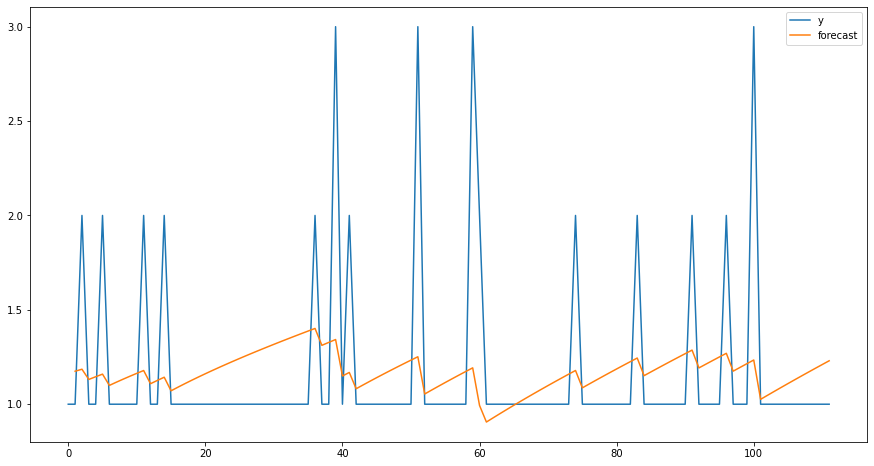

In [41]:
df_stats_model = df_deliveries_count
model = sm.tsa.ARIMA(df_stats_model['y'].iloc[1:], order = (1,0,1))
results = model.fit()
df_stats_model['forecast'] = results.fittedvalues
df_stats_model[['y', 'forecast']].plot(figsize=(15,8))

<div class="alert alert-info">

### Forecasting orders from the above data with x labels as dates:
    
</div>

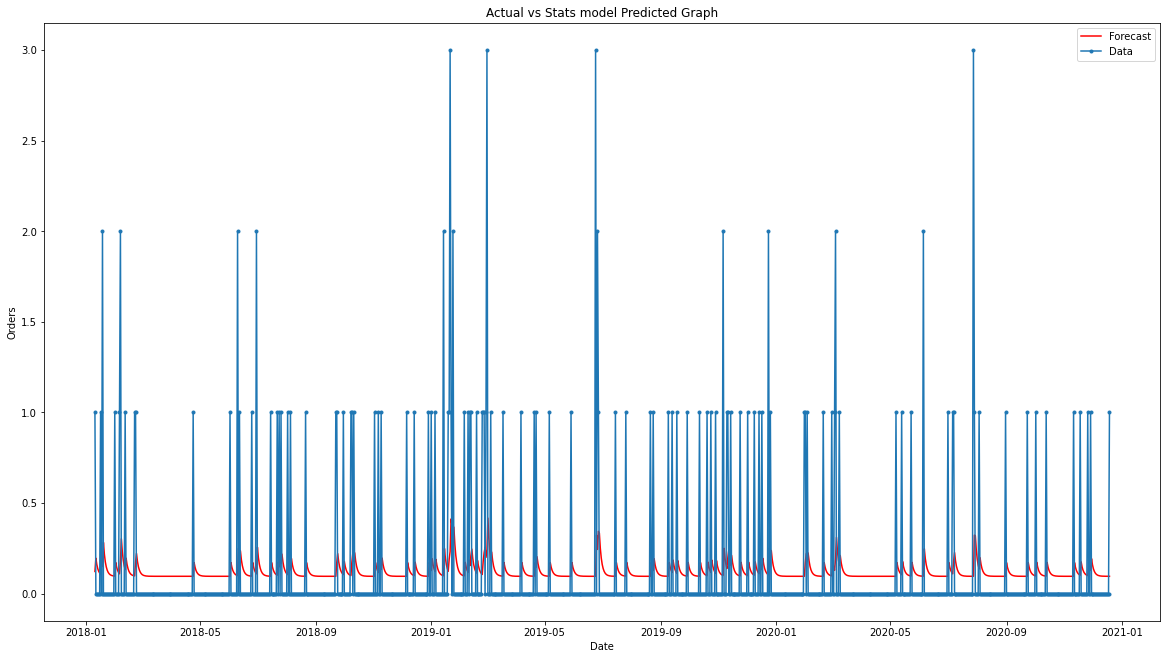

In [42]:
lzip = lambda *x:list(zip(*x))

days = df_deliveries_count.groupby('ds')['ds'].value_counts()
Y = df_deliveries_count['y'].values
X = lzip(*days.index.values)[0]
firstDay = min(X)

# To achieve data consistancy with both actual data and predicted values, I'm adding zeros to dates that do not have orders 
Ys = [0,]*((max(X) - firstDay).days + 1)#[firstDay + timedelta(days=day) for day in range((max(X) - firstDay).days + 1)]
days = pd.Series([firstDay + timedelta(days=i) for i in range(len(Ys))])
for x, y in zip(X, Y):
    Ys[(x - firstDay).days] = y
# parameters of the stats model is based on the below two graphs
est = sm.tsa.ARIMA(Ys, order=(1,0,1)).fit()
yHat = est.fittedvalues
 
fig, axs = plt.subplots(1, 1, figsize=(20, 11))
X = mdates.date2num(days)
axs.plot(X, yHat, c='red', label='Forecast')
axs.plot(X, Ys, marker='.', label='Data')
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Actual vs Stats model Predicted Graph')
axs.set_xlabel('Date')
axs.set_ylabel('Orders')
plt.show()

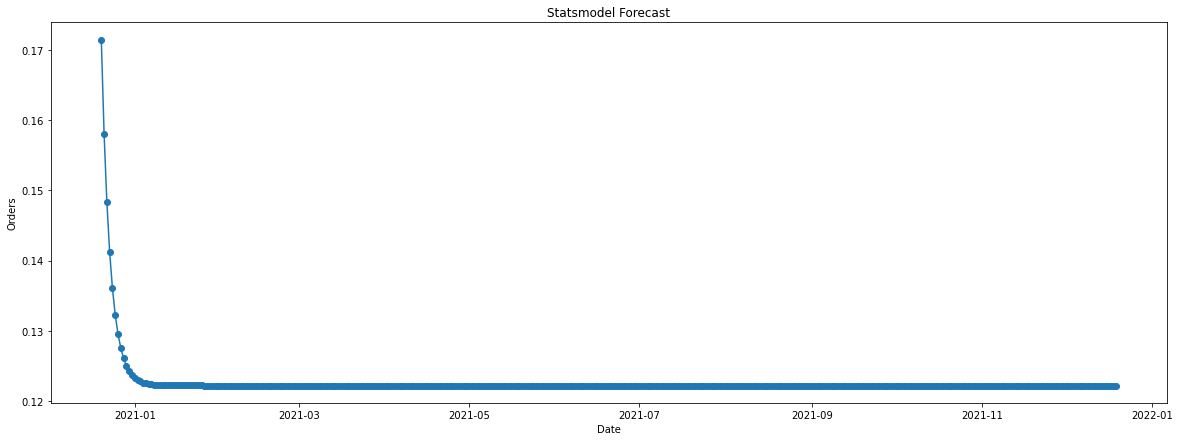

In [43]:
# Plotting the forecast:
lastDay = max(df_deliveries_count['ds'])
X = [lastDay + timedelta(days=i) for i in range(1, 365 + 1)]
weekday = pd.Series([x.weekday() for x in X])
X = mdates.date2num(X)
# Predict orders for future dates:
pred_fd = est.forecast(steps=365)
Y = pred_fd[0]

fig, axs = plt.subplots(1, 1, figsize=(20, 7))
axs.plot(X, Y, marker='o', label='Forecast')
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.set_title('Statsmodel Forecast')
axs.set_xlabel('Date')
axs.set_ylabel('Orders')
plt.show()



</div><div class="alert alert-success">

# Experiment #3
## LSTMs using TensorFlow 2 and Keras

    

</div>






<div class="alert alert-info">   
    
### Forecasting orders for all zip codes.
    
</div>

In [44]:
# Creating data for all zip codes
lzip = lambda *x:list(zip(*x))

days = df_deliveries_allzip.groupby('ds')['ds'].value_counts()
Y = df_deliveries_allzip['y'].values
X = lzip(*days.index.values)[0]
firstDay = min(X)

# To achieve data consistancy with both actual data and predicted values, I'm adding zeros to dates that do not have orders 
Ys = [0,]*((max(X) - firstDay).days + 1)#[firstDay + timedelta(days=day) for day in range((max(X) - firstDay).days + 1)]
days = pd.Series([firstDay + timedelta(days=i) for i in range(len(Ys))])
for x, y in zip(X, Y):
    Ys[(x - firstDay).days] = y

In [45]:
# modify the data that is suitable for LSTM
Ys = np.array(Ys)
Ys = Ys.astype('float32')
Ys = np.reshape(Ys, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
Ys = scaler.fit_transform(Ys)
train_size = int(len(Ys) * 0.80)
test_size = len(Ys) - train_size
train, test = Ys[0:train_size,:], Ys[train_size:len(Ys),:]
print('train size:',len(train),", test size:",len(test))

train size: 876 , test size: 220


In [46]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [47]:
# Look back decides how many days of data the model looks at for prediction
look_back = 30 # Here LSTM looks at approximately one month data
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# verifying the shapes
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((845, 1, 30), (189, 1, 30), (845,), (189,))

In [48]:
# # Model to forecast orders for all zip code
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
13/13 [==============================] - 2s 52ms/step - loss: 0.0561 - val_loss: 0.0277
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - val_loss: 0.0270
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.0260
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0293 - val_loss: 0.0252
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.0248
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0283 - val_loss: 0.0243
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.0239
Epoch 8/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.0236
Epoch 9/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.0234
Epoch 10/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0260 - val_loss: 0.0232
Epoch 11/20
13/13 

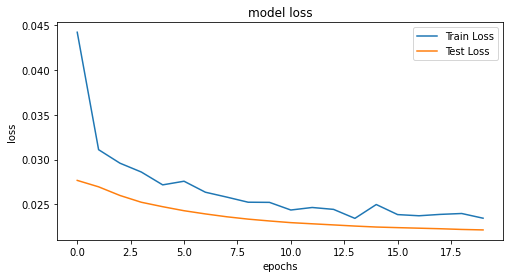

In [49]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [50]:
# predict orders for test data
y_pred = model.predict(X_test)

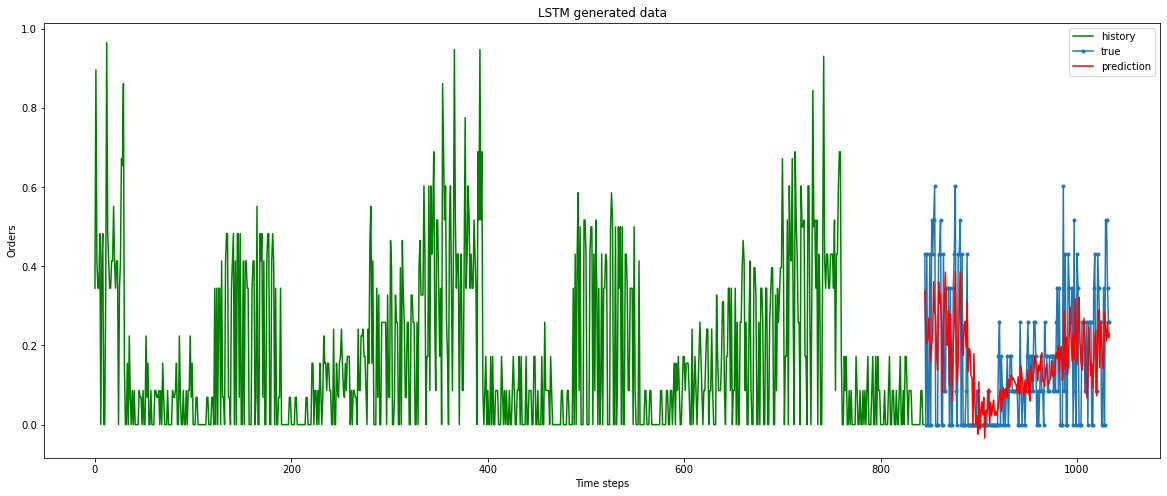

In [51]:
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
X = mdates.date2num(days)
axs.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="history")
axs.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test, marker='.', label="true")
axs.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), y_pred, 'r', label="prediction")
axs.legend()
axs.set_title('LSTM generated data')
axs.set_xlabel('Time steps')
axs.set_ylabel('Orders')
plt.show()

<div class="alert alert-info">

### Forecasting orders from the above data with x labels as dates:
    
</div>

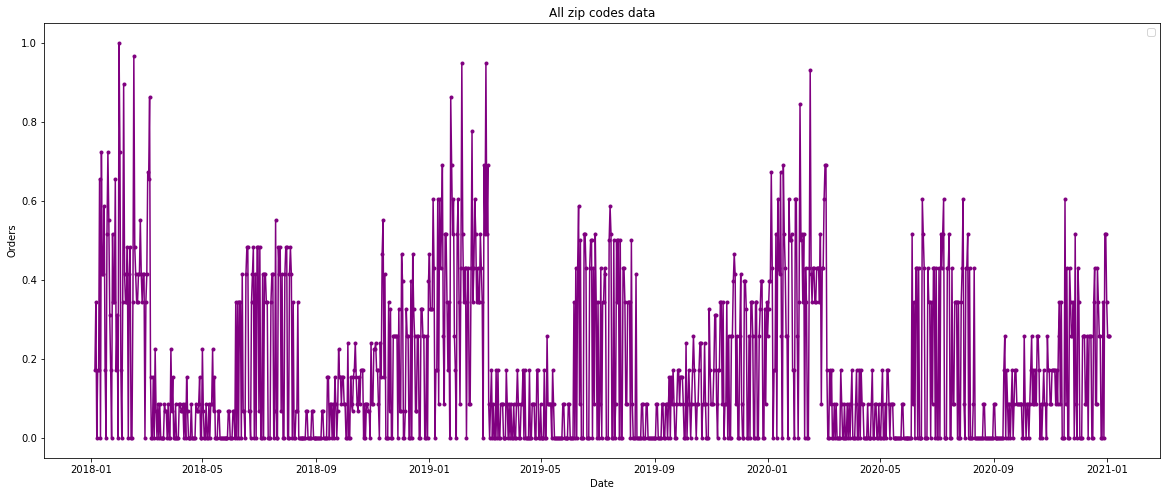

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
X = mdates.date2num(days)
axs.plot(X, Ys, 'purple', marker='.')
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('All zip codes data')
axs.set_xlabel('Date')
axs.set_ylabel('Orders')
plt.show()

<div class="alert alert-warning">
The above two graphs look different. In the graph named LSTM generated data we are missing a few datapoints, this is because of the look back feature of the LSTM model. The cell containing the method called create_dataset we have the expression:
    
**for i in range(len(dataset)-look_back-1):** 
    
due to which we loose some datapoints. In the below cell the plot named (Actual data vs predicted data) contains all the datapoints from the begining date until the point where prediction is plotted (actual data is displayed instead of Y_train) whereas Y_test is used as it is.
</div>

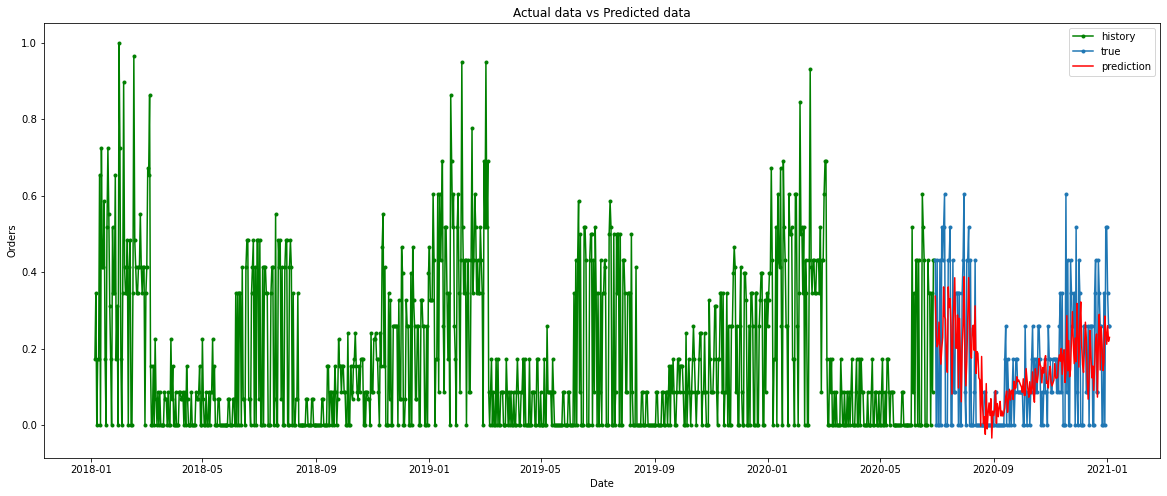

In [53]:
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
X = mdates.date2num(days)
axs.plot(X[:907], Ys[:907], marker='.', color = 'g', label="history")
axs.plot(X[907:], Y_test, marker='.', label="true")
axs.plot(X[907:], y_pred, 'r', label="prediction")
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Actual data vs Predicted data')
axs.set_xlabel('Date')
axs.set_ylabel('Orders')
plt.show()